# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Analysis
#1. There is high negative corralation between Latitude and Max Temerature, which means that whith increasing Latitude values
# Max Temperature is getting lower
#2. There is weak correlation between Latitude and Humidity
#3. No correlation is observed between Latitude and Wind Speed

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pprint
import scipy.stats as st

# Import API key
# Plese note that you have to use your own API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count

num_of_cities = len(cities)
print(num_of_cities)


636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [108]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
name = []
lat = []
temp = []
humid = []
cloudiness = []
wind = []
record = 0

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    record += 1
    
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        print(f"Processing Record {record} of {num_of_cities} | {response['name']}")
        print(query_url + city.replace(" ","%20"))
        
        #Wait time set to 1.01s - for compliance with API key subscription
        time.sleep(1.01)
    except:
        print(f"Record: {record} not found for city: {city}")
    continue
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

#Current date 
current_date = datetime.date.today()
print(f"Current Date: {current_date}")
print("------------------------------")

# create a data frame from cities, latitude, temperature, cloudiness and wind
weather_dict = {
    "City": name,
    "Latitude": lat,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloudiness,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
#weather_data

Beginning Data Retrieval
------------------------------
Processing Record 1 of 636 | Abashiri
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=abashiri
Record: 2 not found for city: taolanaro
Processing Record 3 of 636 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=tasiilaq
Processing Record 4 of 636 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=barrow
Processing Record 5 of 636 | Portland
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=portland
Processing Record 6 of 636 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=qaanaaq
Processing Record 7 of 636 | George Town
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=georgetown
Proce

Processing Record 59 of 636 | Kiruna
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kiruna
Processing Record 60 of 636 | Khatanga
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=khatanga
Processing Record 61 of 636 | Muros
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=muros
Processing Record 62 of 636 | Bluff
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=bluff
Processing Record 63 of 636 | Slave Lake
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=slave%20lake
Processing Record 64 of 636 | Itarema
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=itarema
Processing Record 65 of 636 | Tucuruí
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a

Record: 119 not found for city: sentyabrskiy
Processing Record 120 of 636 | Novi Pazar
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=novi%20pazar
Processing Record 121 of 636 | Yangi Marg`ilon
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=komsomolskiy
Processing Record 122 of 636 | Ternate
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=ternate
Processing Record 123 of 636 | Pleshanovo
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=pleshanovo
Processing Record 124 of 636 | Novo Aripuanã
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=novo%20aripuana
Processing Record 125 of 636 | Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=batagay-alyta
Re

Processing Record 176 of 636 | Maputo
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=maputo
Record: 177 not found for city: saleaula
Processing Record 178 of 636 | San Quintín
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=san%20quintin
Processing Record 179 of 636 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kavaratti
Processing Record 180 of 636 | Novy Urengoy
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=novyy%20urengoy
Processing Record 181 of 636 | Pochutla
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=pochutla
Processing Record 182 of 636 | Khovd
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=hovd
Processing Record 183 of 636 | Urubic

Processing Record 235 of 636 | Derazhnya
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=derazhnya
Processing Record 236 of 636 | Luena
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=luena
Processing Record 237 of 636 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=mount%20isa
Processing Record 238 of 636 | Saint George
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=saint%20george
Processing Record 239 of 636 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kaitangata
Record: 240 not found for city: gulshat
Processing Record 241 of 636 | Yakeshi
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=yakeshi
Processing Record 242 of 636 | Danvi

Record: 291 not found for city: haibowan
Record: 292 not found for city: ngukurr
Processing Record 293 of 636 | Caravelas
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=caravelas
Processing Record 294 of 636 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=rio%20grande
Processing Record 295 of 636 | Mahajanga
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=mahajanga
Processing Record 296 of 636 | Farim
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=farim
Processing Record 297 of 636 | Faya
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=faya
Processing Record 298 of 636 | Galeana
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=galeana
Processing Re

Processing Record 350 of 636 | Mukō
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=muko
Processing Record 351 of 636 | Omboué
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=omboue
Processing Record 352 of 636 | Fort Morgan
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=fort%20morgan
Processing Record 353 of 636 | Kathu
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kathu
Processing Record 354 of 636 | Husavik
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=husavik
Processing Record 355 of 636 | Ocean Springs
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=ocean%20springs
Processing Record 356 of 636 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 407 of 636 | Okha
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=okha
Processing Record 408 of 636 | Beaumont
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=beaumont
Processing Record 409 of 636 | Lorengau
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=lorengau
Processing Record 410 of 636 | Kaseda-shirakame
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kaseda
Processing Record 411 of 636 | Schertz
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=schertz
Record: 412 not found for city: macaboboni
Processing Record 413 of 636 | Lethem
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=lethem
Processing Record 414 of 636 | Cap Malheureux
http://

Processing Record 463 of 636 | Kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kungurtug
Processing Record 464 of 636 | Penzance
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=penzance
Processing Record 465 of 636 | Caborca
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=caborca
Processing Record 466 of 636 | Sijunjung
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=sijunjung
Processing Record 467 of 636 | Halifax
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=halifax
Processing Record 468 of 636 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=vestmannaeyjar
Processing Record 469 of 636 | Port Macquarie
http://api.openweathermap.org/

Processing Record 518 of 636 | Baoqing
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=baoqing
Processing Record 519 of 636 | Wamba
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=wamba
Processing Record 520 of 636 | Baghdad
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=baghdad
Processing Record 521 of 636 | Les Escoumins
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=les%20escoumins
Processing Record 522 of 636 | Sishui
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=sishui
Processing Record 523 of 636 | Clyde River
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=clyde%20river
Processing Record 524 of 636 | Pozoblanco
http://api.openweathermap.org/data/2.5/w

Processing Record 573 of 636 | Nago
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=nago
Processing Record 574 of 636 | Morón
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=moron
Processing Record 575 of 636 | Kuril'sk
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=kurilsk
Processing Record 576 of 636 | Camacupa
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=camacupa
Processing Record 577 of 636 | Helena
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=helena
Processing Record 578 of 636 | Patea
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=patea
Processing Record 579 of 636 | Jiazi
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8d

Processing Record 632 of 636 | Fomboni
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=fomboni
Processing Record 633 of 636 | Mormugao
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=mormugao
Processing Record 634 of 636 | Belmonte
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=belmonte
Processing Record 635 of 636 | Krasnoarmiys'k
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=pokrovsk
Processing Record 636 of 636 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?appid=bfef1c6b4dba16a21b3ff8daf113f696&units=imperial&q=saint-pierre
------------------------------
Data Retrieval Complete
------------------------------
Current Date: 2020-11-07
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
# Adding dynamic date into output file name
out_file_name = "cities_weather_data_"+str(current_date)+".csv"
weather_data.to_csv(out_file_name)

In [110]:
weather_data.head()

,City,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abashiri,44.02,46.40,93,20,4.70
1,Tasiilaq,65.61,28.40,68,66,5.82
2,Barrow,71.29,30.20,86,90,21.92
3,Portland,45.52,44.64,75,75,3.36
4,Qaanaaq,77.48,-12.53,70,0,9.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

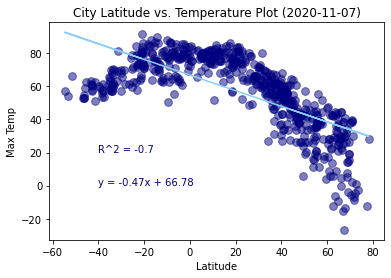

In [120]:
weather_data.plot(kind="scatter",x="Latitude",y="Max Temp",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Temperature Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Max Temp'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Max Temp'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-40,20), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-40,0), fontsize = 10, color="navy")
plt.savefig("City_Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

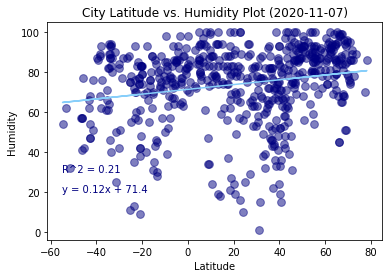

In [117]:
weather_data.plot(kind="scatter",x="Latitude",y="Humidity",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Humidity Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Humidity'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Humidity'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-55,30), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-55,20), fontsize = 10, color="navy")

plt.savefig("City_Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

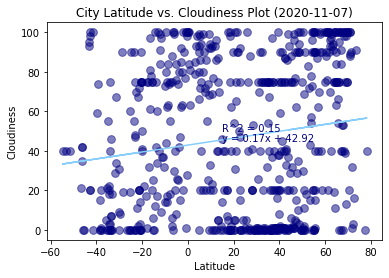

In [113]:
weather_data.plot(kind="scatter",x="Latitude",y="Cloudiness",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Cloudiness Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Cloudiness'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Cloudiness'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(15,50), fontsize = 10, color="navy")
plt.annotate(reg_eq,(15,45), fontsize = 10, color="navy")

plt.savefig("City_Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

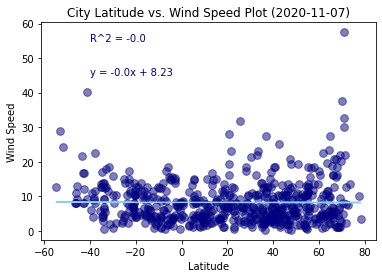

In [116]:

weather_data.plot(kind="scatter",x="Latitude",y="Wind Speed",s=60, c='navy', edgecolors="navy",alpha=0.5)
title = "City Latitude vs. Wind Speed Plot ("+str(current_date)+")"
plt.title(title)

correlation_coef = round(st.pearsonr(weather_data['Latitude'],weather_data['Wind Speed'])[0],2)
corr_coef = "R^2 = " + str(round(correlation_coef,2))

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weather_data['Latitude'],weather_data['Wind Speed'])
tw_fit = tw_slope * weather_data['Latitude'] + tw_int
reg_eq = "y = " + str(round(tw_slope,2)) + "x + " +str(round(tw_int,2))
plt.plot(weather_data['Latitude'],tw_fit,"lightskyblue")

plt.annotate(corr_coef,(-40,55), fontsize = 10, color="navy")
plt.annotate(reg_eq,(-40,45), fontsize = 10, color="navy")


plt.savefig("City_Lat_vs_Windspeed.png")
plt.show()